In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=47be417935004d6b071bc4b9a6114888a00b2fc95a21312061f7d778f633f210
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [ ]:
!pip install -U symspellpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 KB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for editdistpy: filename=editdistpy-0.1.3-cp39-cp39-linux_x86_64.whl size=141223 sha256=ebd15d1fda265d05da7d45c9da142eb25af520a7eba7a1bae8711d8105536881
  Stored in directory: /root/.cache/pip/wheels/72/16/b1/ea6472dedd6ac13ad789dd294871a76fd6906fca3c010347d1
Successfully built editdistpy


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import glob
import re
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.util import ngrams
from collections import Counter
import emoji
import nltk
import html

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# change directory to the folder that contains csv files
%cd /content/drive/MyDrive/NetServ/Sample_Data/v2/

# Get the file names
filenames = glob.glob("*.csv") # assuming the files are in the current directory

# Sort the file names in alphabetical order
filenames.sort()

# Read and concatenate the files
dfs = [] # an empty list to store the data frames

# loop through each file name and read it as a data frame
for filename in filenames:
    df = pd.read_csv(filename) # read each file with header
    dfs.append(df) # append each data frame to the list

# Concatenate all data frames in the list
big_df = pd.concat(dfs, ignore_index=True)
df = big_df.copy()


/content/drive/MyDrive/NetServ/Sample_Data/v2


In [ ]:
# 3 star ratings
# Define a dictionary that maps the original ratings to the new ratings
rating_map = {
    1: -1,
    2: -1,
    3: 0,
    4: 1,
    5: 1
}

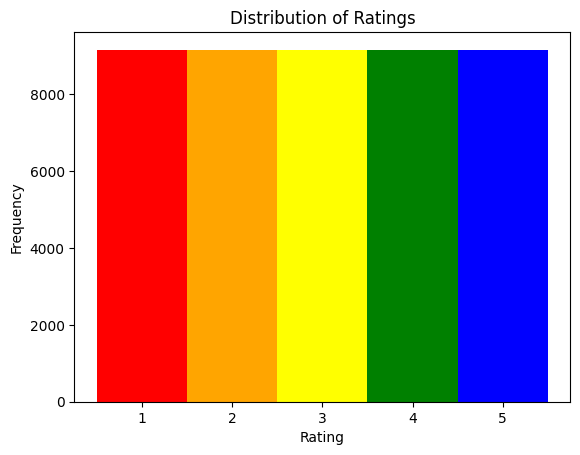

In [ ]:
# get histogram data
counts, bins = np.histogram(df['rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5])

# define colors for each bar
colors = ['red', 'orange', 'yellow', 'green', 'blue']

# create bar plot with specified colors and alignment
plt.bar(bins[:-1] + 0.5, counts, width=np.diff(bins), color=colors, align='center')

# add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

# show plot
plt.show()

In [ ]:
# Create a new column by applying the map function to the rating column
df["new_rating"] = df["rating"].map(rating_map)
# Convert rating to categorical variable
#df["new_rating"] = df["new_rating"].astype("category")
# Convert rating to categorical variable
#df["rating"] = df["rating"].astype("category")
# convert review_comment column to text
#df["review_comment"] = df["review_comment"].astype(str)

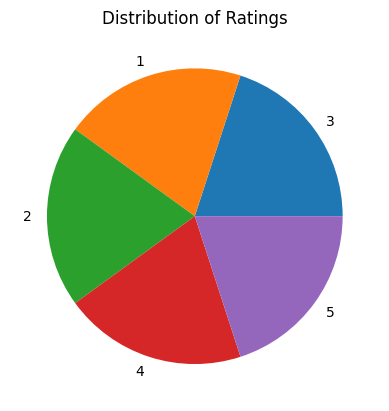

In [ ]:
rating_counts = df['rating'].value_counts()

# create pie chart
plt.pie(rating_counts, labels=rating_counts.index)

# add title
plt.title('Distribution of Ratings')

# show plot
plt.show()

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['review_comment'], df['rating'], test_size=0.25, random_state=1, stratify=df['rating'])

In [ ]:
#Concatenating the training instances (reviews and target Variable)
X_train_df = pd.concat([X_train, y_train], axis = 1)
X_train_df = X_train_df.reset_index(drop=True)
X_train_df.head()

,review_comment,rating
0,unfortunately name of celebrity not certain bu...,4
1,Airport was mobbed. Cops had things blocked of...,1
2,busy today but sign tell departure to go to ar...,4
3,(Translated by Google) Long wait!!!\n\n(Origin...,2
4,think hollywood need a gold checkmate,3


# Pre Processing

## Expanding Contractions

In [ ]:
# Take Care of CAPS :3
contraction_mapping = {"It's":"it is","it's":"it is", "its": "it is","ain't": "not", "aren't": "are not","can't": "can not", 'cannot':'can not',"'cause": "because",
        "could've": "could have", "couldn't": "could not", "didn't": "did not",
        "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not",
        "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", 
        "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
        "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have",
        "I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
        "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
        "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is",
        "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have",
        "mightn't": "might not","mightn't've": "might not have", "must've": "must have", 
        "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
        "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", 
        "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
        "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", 
        "she'll": "she will", "she'll've": "she will have", "she's": "she is", 
        "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", 
        "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": 
        "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", 
        "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
        "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
        "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will",
        "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
        "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
        "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", 
        "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
        "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
        "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", 
        "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
        "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
        "you're": "you are", "you've": "you have" }

In [ ]:
def expandContractions(text):
        updatedtext = ""
        for word in text.split():
            if word in contraction_mapping:
                updatedtext += contraction_mapping[word] + " "
            else:
                updatedtext += word + " "
                
        return updatedtext[:-1]

X_train_df['review_comment'] = X_train_df['review_comment'].apply(expandContractions)

In [ ]:
# to show how our functions are performing

diction = {'review_comment':["it's nice, it could've been beter",
                   "lloved it!!!! visit www.amazon.com/smartphones", 
                   "didn't like, junkkyyy, woorst piroduct",
                   "this is just awesoommee, worth the money",
                   "I'd recommend, but its a bit heavy",
                   "could have been much better, worst display though"
                  ]
        }
post_this_step = pd.DataFrame(diction)

In [ ]:
# after expanding contractions

post_this_step['Expanded Reviews'] = post_this_step['review_comment'].apply(expandContractions)
post_this_step.head()

,review_comment,Expanded Reviews
0,"it's nice, it could've been beter","it is nice, it could have been beter"
1,lloved it!!!! visit www.amazon.com/smartphones,lloved it!!!! visit www.amazon.com/smartphones
2,"didn't like, junkkyyy, woorst piroduct","did not like, junkkyyy, woorst piroduct"
3,"this is just awesoommee, worth the money","this is just awesoommee, worth the money"
4,"I'd recommend, but its a bit heavy","I would recommend, but it is a bit heavy"


In [ ]:
# Emojis can we move them to another column ?? (feature engg)
# ************************
# Handling Emojis

# define a function to replace emojis with their names
def replace_emojis(text):
  # use the demojize function to convert emojis to text
  # use the delimiters parameter to add spaces around the text
  return emoji.demojize(text, delimiters=(" ", " "))
X_train_df['review_comment'] = X_train_df['review_comment'].apply(replace_emojis)

In [ ]:
# Define a function to replace HTML ASCII codes with characters
def replace_html_ascii(text):
  # Use html.unescape() to convert codes to characters
  return html.unescape(text)

# Apply the function to the review_comment column of X_train_df
X_train_df['review_comment'] = X_train_df['review_comment'].apply(replace_html_ascii)

## Tokenization

In [ ]:
from nltk.tokenize import RegexpTokenizer

# based on the study of this dataset, we can ignore :), ;( 
def tokenization(text):
        text = re.sub(r'www','https',text)
        text = re.sub(r'http[^\s]+','',text)
        text = re.sub('@[^\s]+','',text)
        tokenizer = RegexpTokenizer("[a-zA-Z]+", discard_empty=True)
        text = tokenizer.tokenize(text)
        text = " ".join(text)
        return text.lower()
    
# applying tokenization along with punctuation removal and lowercasing
X_train_df['review_comment'] = X_train_df['review_comment'].apply(tokenization)

In [ ]:
X_train_df.head()

,review_comment,rating
0,translate by google brutal airport original bu...,1
1,easy to use but this activity takes too little...,3
2,come a no expectation after leave realize right,1
3,a landmark a place worth visit,4
4,need ability to park not to keep go,4


In [ ]:
#after applying tokenization 
post_this_step['Tokenized Reviews'] = post_this_step['Expanded Reviews'].apply(tokenization)
post_this_step.head()

,review_comment,Expanded Reviews,Tokenized Reviews
0,"it's nice, it could've been beter","it is nice, it could have been beter",it is nice it could have been beter
1,lloved it!!!! visit www.amazon.com/smartphones,lloved it!!!! visit www.amazon.com/smartphones,lloved it visit
2,"didn't like, junkkyyy, woorst piroduct","did not like, junkkyyy, woorst piroduct",did not like junkkyyy woorst piroduct
3,"this is just awesoommee, worth the money","this is just awesoommee, worth the money",this is just awesoommee worth the money
4,"I'd recommend, but its a bit heavy","I would recommend, but it is a bit heavy",i would recommend but it is a bit heavy


With tokenization we have removed below mentioned punctuation symbols

We contains the following punctuation symbols

!"#$%&\'()*+,-./:;<=>?@[\]^_{|}~`

We need to retain emotion conveying punctuation marks such as :), :)), :(

We can add or remove more punctuations as per our need.

In [ ]:
stop_words= ['yourself','yourselves','herself', 'themselves', 'himself', 'ourselves',
            'myself', 'between', 'whom', 'is', "she", 'here', 'your', 'each', 'we', 'he',
            'my', 'you', 'are', 'them', 'other','and', 'an', 'their', 'can', 'she', 'these',
            'ours', 'while', 'have', 'when', 'were', 'who', 'they', 'has', 'before', 'yours',
             "it", 'on',  'now', 'her', 'an', 'from', "would",'how', 'the', 'or', 'doing',
            'his',  'was', 'through', 'own', 'theirs', 'me', 'him', 'be', 'same', 'it', 'its', 
            'which', 'there','our', 'this', 'hers', 'being', 'did','those', 'i', 'does', 'will',
            'shall', 's','t','n','d', 'e','u', 'x','am','get','ve']

In [ ]:
# function to filter out stopwords
def removeStopwords(text):
        updatedtext = ""
        for word in text.split():
            if(word not in stop_words):
                updatedtext += word + " "

        return updatedtext[:-1]

# removing stopwords from the Reviews attribute
X_train_df['review_comment'] = X_train_df['review_comment'].apply(removeStopwords)

In [ ]:
post_this_step['Stopwords Removed Reviews'] = post_this_step['Tokenized Reviews'].apply(removeStopwords)
post_this_step

,review_comment,Expanded Reviews,Tokenized Reviews,Stopwords Removed Reviews
0,"it's nice, it could've been beter","it is nice, it could have been beter",it is nice it could have been beter,nice could been beter
1,lloved it!!!! visit www.amazon.com/smartphones,lloved it!!!! visit www.amazon.com/smartphones,lloved it visit,lloved visit
2,"didn't like, junkkyyy, woorst piroduct","did not like, junkkyyy, woorst piroduct",did not like junkkyyy woorst piroduct,not like junkkyyy woorst piroduct
3,"this is just awesoommee, worth the money","this is just awesoommee, worth the money",this is just awesoommee worth the money,just awesoommee worth money
4,"I'd recommend, but its a bit heavy","I would recommend, but it is a bit heavy",i would recommend but it is a bit heavy,recommend but a bit heavy
5,"could have been much better, worst display though","could have been much better, worst display though",could have been much better worst display though,could been much better worst display though


Spelling correction with Repeated characters replacement

In [ ]:
# installing the package and importing the required libraries

import pkg_resources
from symspellpy import SymSpell, Verbosity # efficient spelling correction

# using the dictionary of enlish words
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt"
) 

In [ ]:
from nltk.corpus import wordnet # to replace repeated words

In [ ]:
def remove_translated_and_original_and_after(text):
    # define a regular expression pattern to match substrings that start with '(translated by' and end with 'google)'
    pattern = re.compile(r'\(translated by.*?google\)', re.IGNORECASE)
    
    # search for the pattern in the text
    match = pattern.search(text)
    
    # check if a match was found
    if match:
        # remove the matched substring from the text
        text = text[:match.start()] + text[match.end():]
        
        # check if the text contains the '(original)' string
        if "(original)" in text.lower():
            # find the index of the '(original)' string
            index = text.lower().index("(original)")
            
            # split the text by the '(Original)' keyword and take the first part
            # remove any leading or trailing whitespace
            return text[:index].strip()
    
    # return the text as it is
    return text
X_train_df['review_comment'] = X_train_df['review_comment'].apply(remove_translated_and_original_and_after)

In [ ]:
class RepeatReplacer(object):
    
    def __init__(self):
        self.repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
        self.repl = r'\1\2\3'

    def replace(self, word):
        if wordnet.synsets(word):
            return word
            
        repl_word = self.repeat_regexp.sub(self.repl, word)
    
        if repl_word != word:
            return self.replace(repl_word)
        else:
            return repl_word

In [ ]:
# instantiating the sym spell object 
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# loading the dictionary to match to the correct words
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

# instantiating the object for repeated character replacement
replacer = RepeatReplacer()

In [ ]:
# function to correct misspelled words
def spellingCorrectionSymSpell(text):
        ans = ""
        for word in text.split():
            # checking for the spelling correction, returns empty ,if it didnt find a word
            # because include_unknown parameter (when false)
            # reason might be the words having repeated characters like gooooooood, excelllleeeeeeent etc
            # which go beyond the edit_distance of 2
            suggestions = sym_spell.lookup(word, Verbosity.TOP, max_edit_distance=2, include_unknown=False)

            if(len(suggestions) == 0):
                text = replacer.replace(word)
                # if still after correction the word is not found, we will skip that word(include_unk = True)
                suggestions = sym_spell.lookup(text, Verbosity.TOP, max_edit_distance=2, include_unknown=True)

            if(len(suggestions) > 0):
                text = str(suggestions[0])
                text = re.search(r'[a-zA-Z]+',str(text))
                ans += (text.group()) + " "
        return ans[:-1]


X_train_df['review_comment'] = X_train_df['review_comment'].apply(spellingCorrectionSymSpell)

In [ ]:
post_this_step.head()

,review_comment,Expanded Reviews,Tokenized Reviews,Stopwords Removed Reviews
0,"it's nice, it could've been beter","it is nice, it could have been beter",it is nice it could have been beter,nice could been beter
1,lloved it!!!! visit www.amazon.com/smartphones,lloved it!!!! visit www.amazon.com/smartphones,lloved it visit,lloved visit
2,"didn't like, junkkyyy, woorst piroduct","did not like, junkkyyy, woorst piroduct",did not like junkkyyy woorst piroduct,not like junkkyyy woorst piroduct
3,"this is just awesoommee, worth the money","this is just awesoommee, worth the money",this is just awesoommee worth the money,just awesoommee worth money
4,"I'd recommend, but its a bit heavy","I would recommend, but it is a bit heavy",i would recommend but it is a bit heavy,recommend but a bit heavy


In [ ]:
post_this_step['Correctly Spelled Reviews'] = post_this_step['Stopwords Removed Reviews'].apply(spellingCorrectionSymSpell)
post_this_step

,review_comment,Expanded Reviews,Tokenized Reviews,Stopwords Removed Reviews,Correctly Spelled Reviews
0,"it's nice, it could've been beter","it is nice, it could have been beter",it is nice it could have been beter,nice could been beter,nice could been better
1,lloved it!!!! visit www.amazon.com/smartphones,lloved it!!!! visit www.amazon.com/smartphones,lloved it visit,lloved visit,loved visit
2,"didn't like, junkkyyy, woorst piroduct","did not like, junkkyyy, woorst piroduct",did not like junkkyyy woorst piroduct,not like junkkyyy woorst piroduct,not like junky worst product
3,"this is just awesoommee, worth the money","this is just awesoommee, worth the money",this is just awesoommee worth the money,just awesoommee worth money,just awesome worth money
4,"I'd recommend, but its a bit heavy","I would recommend, but it is a bit heavy",i would recommend but it is a bit heavy,recommend but a bit heavy,recommend but a bit heavy
5,"could have been much better, worst display though","could have been much better, worst display though",could have been much better worst display though,could been much better worst display though,could been much better worst display though


In [ ]:
post_this_step.drop(columns=['review_comment', 'Expanded Reviews', 'Tokenized Reviews'], inplace=True)


In [ ]:
# importing the required libraries 
import spacy  
sp = spacy.load('en_core_web_sm') # english language model

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
# Define a function to count the number of uppercase words in a sentence
def count_uppercase_words(sentence):
  # Split the sentence by whitespace
  words = sentence.split()
  # Initialize a counter
  count = 0
  # Loop through the words
  for word in words:
    # Check if the word is all uppercase using str.isupper()
    if word.isupper():
      # Increment the counter
      count += 1
  # Return the counter
  return count

# Apply the function to the review_comment column of X_train_df and store the result in a new column
X_train_df['uppercase_words'] = X_train_df['review_comment'].apply(count_uppercase_words)

In [ ]:
# Recheck : find a way to preserve degree of emotion , without losing processing power : Or considering not using lemmatization.
# *************************************

#(SpaCy lemmatizer is much more accurate but takes longer than nltk)
def lemmatizeTextSpacy(text):
    lemmatizedList = ""
    text = sp(text)
    for word in text:
        lem_word = word.lemma_
        lemmatizedList += lem_word + " "
    return lemmatizedList[:-1]

X_train_df['review_comment'] = X_train_df['review_comment'].apply(lemmatizeTextSpacy)

In [ ]:
post_this_step['lemmatized Reviews'] = post_this_step['Correctly Spelled Reviews'].apply(lemmatizeTextSpacy)
post_this_step

,Stopwords Removed Reviews,Correctly Spelled Reviews,lemmatized Reviews
0,nice could been beter,nice could been better,nice could be well
1,lloved visit,loved visit,love visit
2,not like junkkyyy woorst piroduct,not like junky worst product,not like junky bad product
3,just awesoommee worth money,just awesome worth money,just awesome worth money
4,recommend but a bit heavy,recommend but a bit heavy,recommend but a bit heavy
5,could been much better worst display though,could been much better worst display though,could be much well bad display though


In [ ]:
# encapsulate all the pre-processing functions together
def preprocessReviewPrintingSteps(review):
        print("The review entererd is: ", review,"\n")
        expanded_review = expandContractions(review)
        print("After expanding contractions: ",expanded_review,"\n")
        tokenized_review = tokenization(expanded_review)
        print("After tokenization: ", tokenized_review,"\n")
        removed_stopwords_review = removeStopwords(tokenized_review)
        print("After removing stop words: ", removed_stopwords_review,"\n")
        spellChecked_review = spellingCorrectionSymSpell(removed_stopwords_review)
        print("After possible repeated letters replacement & spelling correction: ", spellChecked_review,"\n")
        lemmatized_review = lemmatizeTextSpacy(spellChecked_review)
        print("After applying lemmatization: ", lemmatized_review,"\n")
        return lemmatized_review

In [ ]:
print(preprocessReviewPrintingSteps("https://www.amazon.com greattttt ......loved it :) I'd hihgly recommedn"))

The review entererd is:  https://www.amazon.com greattttt ......loved it :) I'd hihgly recommedn 

After expanding contractions:  https://www.amazon.com greattttt ......loved it :) I would hihgly recommedn 

After tokenization:  greattttt loved it i would hihgly recommedn 

After removing stop words:  greattttt loved hihgly recommedn 

After possible repeated letters replacement & spelling correction:  great loved highly recommend 

After applying lemmatization:  great love highly recommend 

great love highly recommend


Adding review length i.e no. of characters in a review and no.of words in a review attribute to explore more

In [ ]:
# function to count characters in a list of strings
def getWordCount(text):
    word_count = 0
    for word in text.split():
        word_count += 1
    return word_count

def getReviewLength(text):
    review_length = 0
    for word in text.split():
        review_length += len(word)
    return review_length

In [ ]:
X_train_df['review_length'] = np.array(X_train_df['review_comment'].apply(getReviewLength))
X_train_df['word_count'] = np.array(X_train_df['review_comment'].apply(getWordCount))

In [ ]:
X_train_df[X_train_df.uppercase_words > 0]

,review_comment,rating,uppercase_words,review_length,word_count


In [ ]:
X_train_df.to_csv('trainData.csv', index = False)

In [ ]:
fig = px.histogram(X_train_df, x='review_length', nbins=50)
fig.update_layout(
    title='Review Length Distribution',
    xaxis_title='Review Length',
    yaxis_title='Count',
    bargap=0.2,
    xaxis_range=[0,100]
)
fig.show()

In [ ]:
fig = px.histogram(X_train_df, x='word_count', nbins=40)
fig.update_layout(
    title='Word Count Distribution',
    xaxis_title='Word Count',
    yaxis_title='Reviews Count',
    bargap=0.2,
    xaxis_range=[0,25]
)
fig.show()

In [ ]:
print(X_train_df[X_train_df['word_count'] == 0].count())
X_train_df.drop(X_train_df[X_train_df['word_count'] == 0].index , inplace = True)

review_comment     0
rating             0
uppercase_words    0
review_length      0
word_count         0
dtype: int64


In [ ]:
dfNegReviews = X_train_df[X_train_df["rating"] < 3]
dfPosReviews = X_train_df[X_train_df["rating"] > 3]

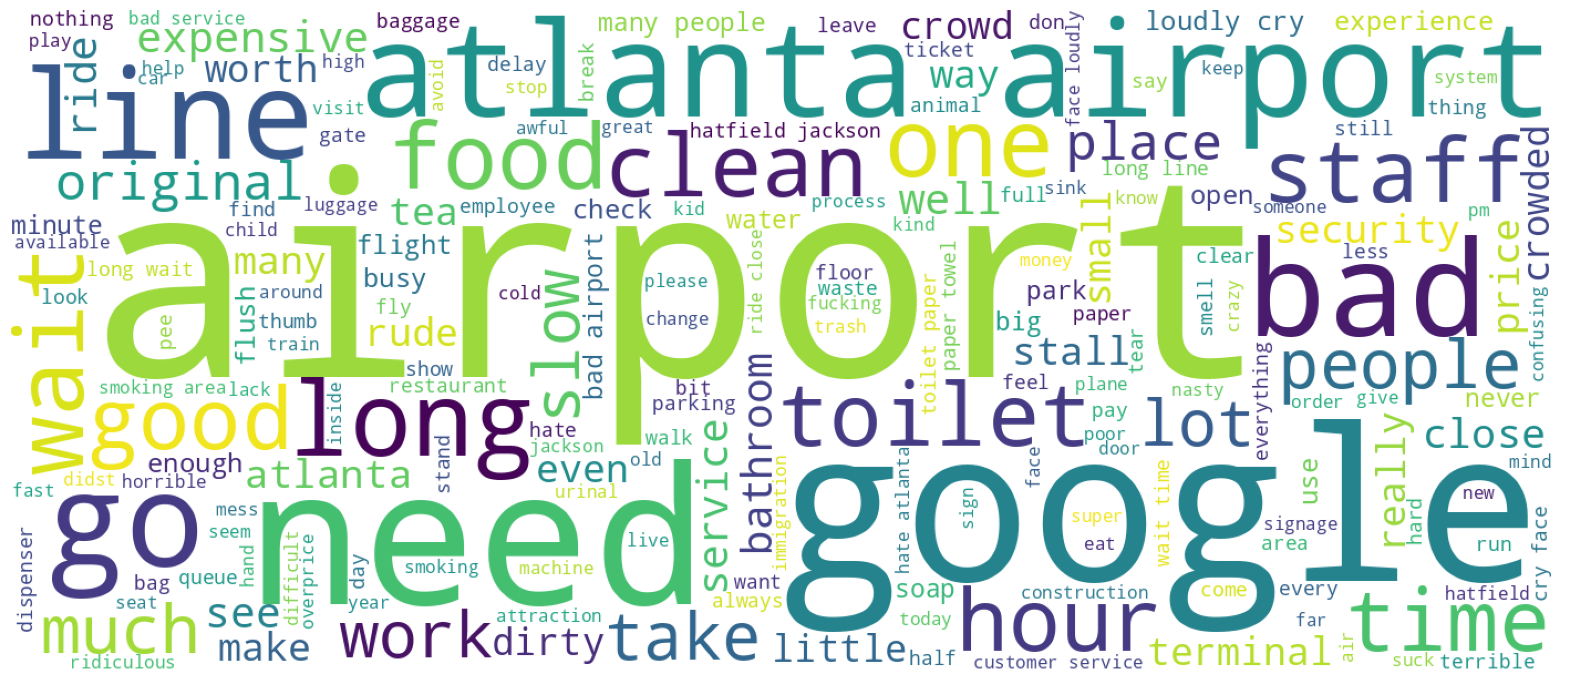

In [ ]:
text = ""
for review in dfNegReviews['review_comment']:
    text += review
        
wordcloud = WordCloud(background_color="white",width=1400, height=600).generate(text)
plt.figure( figsize=(20,10))
plt.axis('off')
plt.imshow(wordcloud)

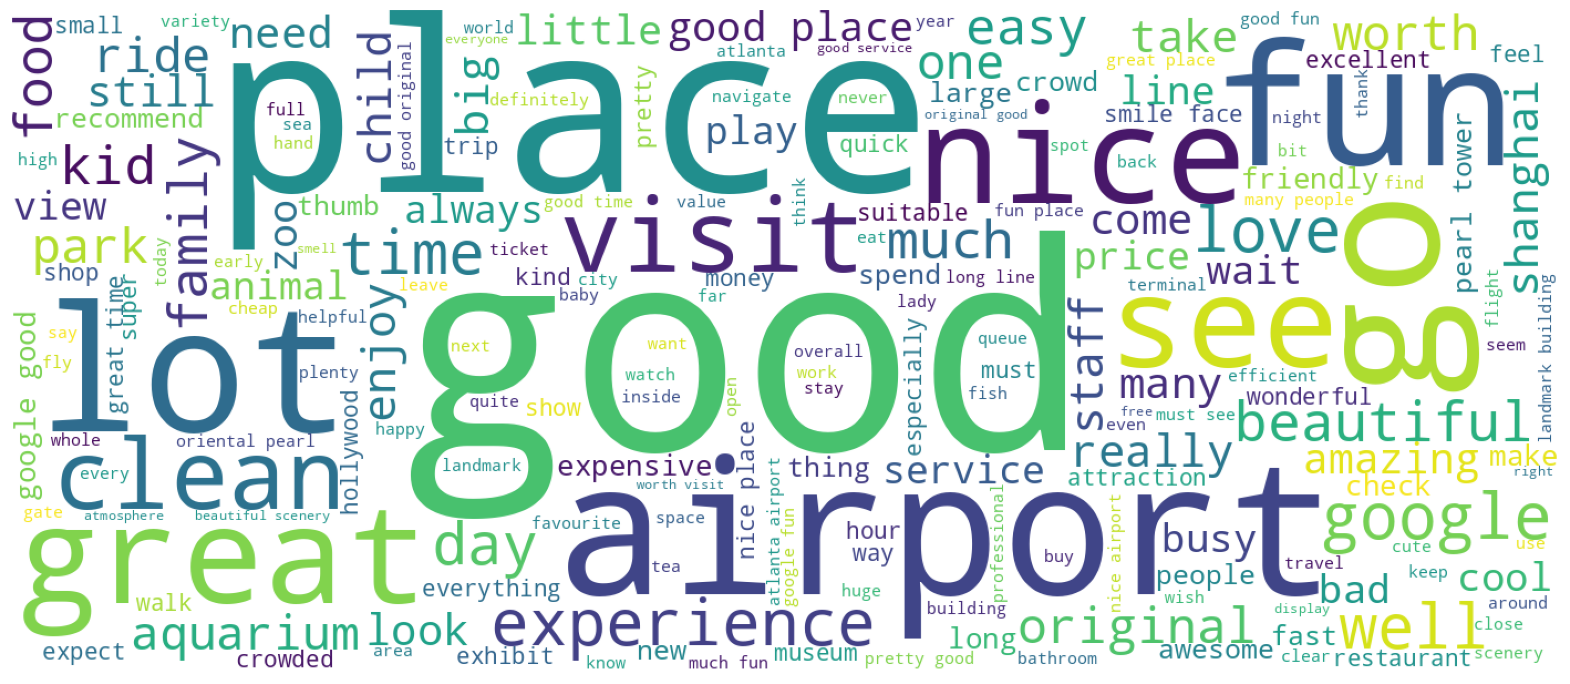

In [ ]:
text = ""
for review in dfPosReviews['review_comment']:
        text += review
        
wordcloud = WordCloud(background_color="white",width=1400, height=600).generate(text)
plt.figure( figsize=(20,10))
plt.axis('off')
plt.imshow(wordcloud)

In [ ]:
def generateNgrams(documents, size):
    '''
    Input: 
    documents: dataframe having only reviews stacked
    size: size of ngram(as 1,2,3..)
    
    Output:
    dataframe:{columns = {'words','count'}}
    '''
    
    
    ngrams_all = []
    
    for document in documents:  # the document is not splitted already
         
        document = document.split()
        
        if len(document) < size:
            continue
        else:
            output = list(ngrams(document, size)) # using NLTK's ngrams function
            
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
            
    count_ngram = Counter()
    
    for word in ngrams_all:  # making word frequency dictionary
        count_ngram[word] += 1
        
    
    # converting from dictionary to dataframe data structure
    
    df = pd.DataFrame.from_dict(count_ngram, orient='index').reset_index()
    
    df = df.rename(columns={'index':'words', 0:'count'})
    
    df = df.sort_values(by='count', ascending=False) # highest freq words on the top
    
    df = df.head(25) # taking 20 most frequent n-grams
    
    df = df.sort_values(by='count')
    
    
    return df

In [ ]:
# function to plot the word frequency distribution

def plotNgrams(documents):
    
    '''
    documents : dataframe attribute having reviews text or lists of reviews
    '''
    
    unigrams = generateNgrams(documents, 1)
    bigrams = generateNgrams(documents, 2)
    trigrams = generateNgrams(documents, 3)
    
    # Set plot figure size
    fig = plt.figure(figsize = (20, 7))
    plt.subplots_adjust(wspace=.5)
    
    # plot 1
    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=1)
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')
    
    # plot 2
    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=1, color = 'red')
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')
    
    # plot 3
    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=1, color = 'green')
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()

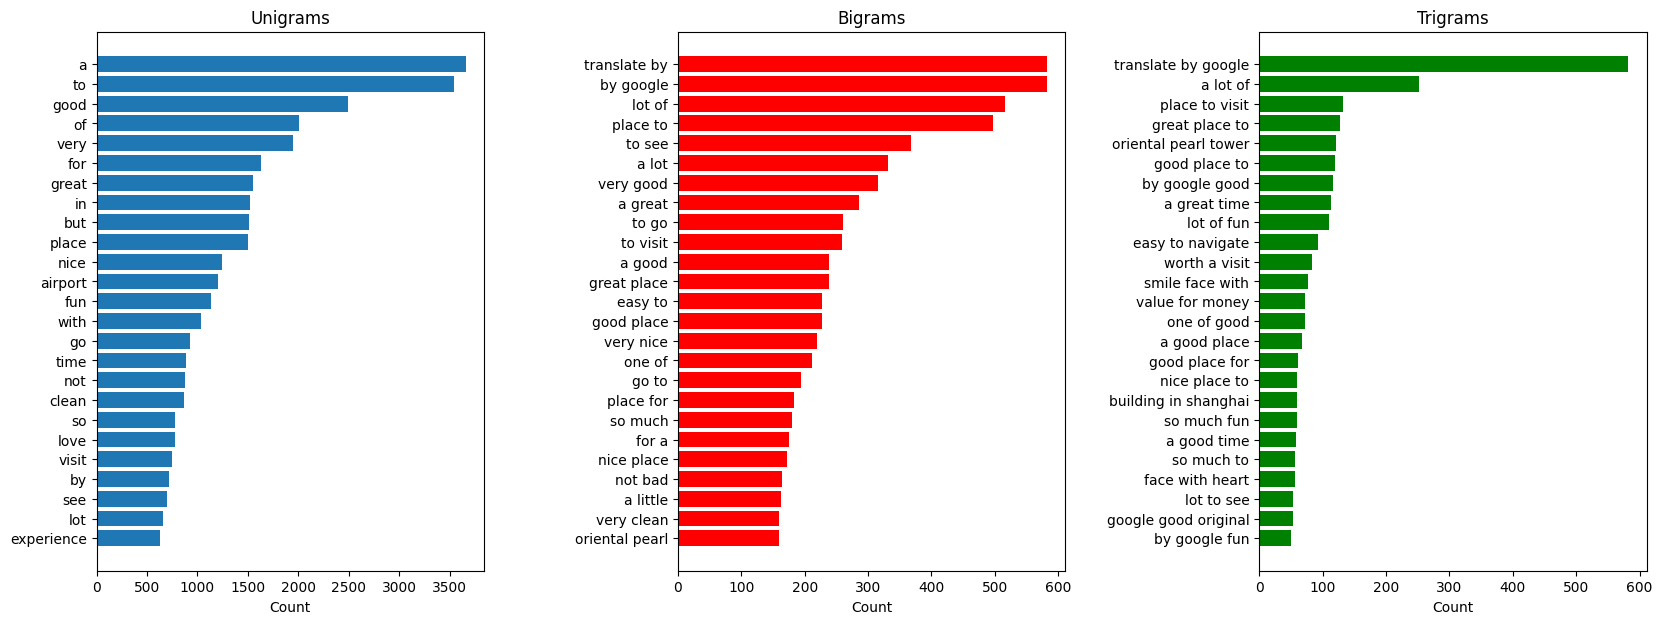

In [ ]:
plotNgrams(dfPosReviews['review_comment'])

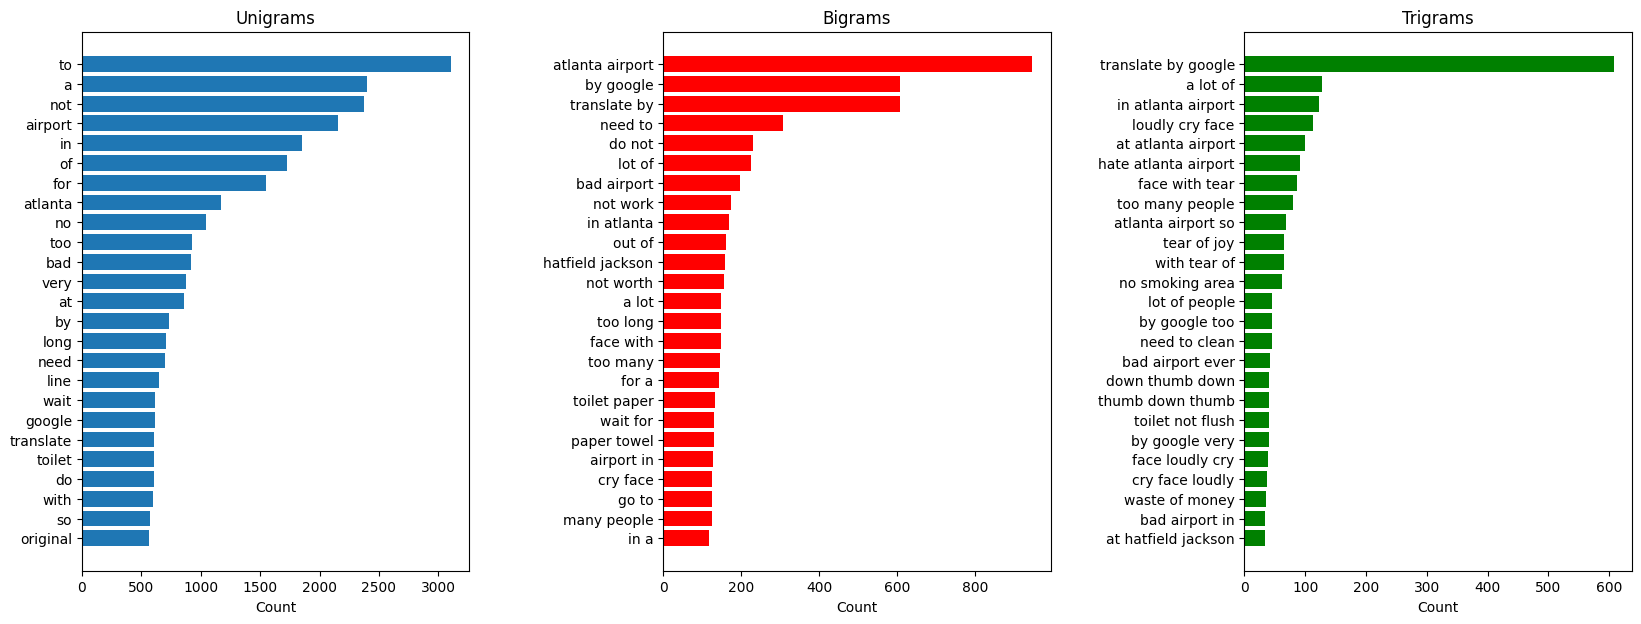

In [ ]:
plotNgrams(dfNegReviews['review_comment'])

In [ ]:
#Unigram
# applying fit_transform to generate document term matrix
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_uni75 = TfidfVectorizer(ngram_range=(1,1))
vectorized_uni75 = vectorizer_uni75.fit_transform(X_train_df['review_comment'])
fvector_uni75 = vectorized_uni75.toarray()

In [ ]:
fvector_uni75

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# looking like everthing is 0, but it is sparse representation

fvector_uni75.sum(axis=0)

array([  7.84554045,   1.59147408,   3.85738272, ..., 121.4304752 ,
         1.21651273,   1.19549718])

In [ ]:
print("The length of the feature vector is :",fvector_uni75.shape[1])

The length of the feature vector is : 6078


In [ ]:
vectorizer_uni75.get_feature_names_out()[100:130]

array(['agreeable', 'ahahahaha', 'ahead', 'ahmed', 'aida', 'aim', 'ain',
       'air', 'airbase', 'aircraft', 'airdrop', 'airfreshener',
       'airfresher', 'airfreshner', 'airfrsgeher', 'airline', 'airlines',
       'airport', 'airtrain', 'airway', 'aisha', 'ajetreado', 'aka',
       'akita', 'al', 'alabama', 'alan', 'alarm', 'alcohol', 'ald'],
      dtype=object)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_uni75 = MultinomialNB()

# Fit Naive Bayes classifier according to X, y.
model_uni75.fit(fvector_uni75,X_train_df['rating'])

MultinomialNB()

In [ ]:
# Perform classification on an array of test vectors.
y_pred = model_uni75.predict(fvector_uni75) 

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Classfication Report for (Unigrams, 75)\n\n")
target_names = ['1', '2', '3', '4', '5']
classification_score = classification_report(X_train_df['rating'], y_pred, target_names=target_names)
print(classification_score)

Classfication Report for (Unigrams, 75)


              precision    recall  f1-score   support

           1       0.78      0.78      0.78      6152
           2       0.69      0.67      0.68      6152
           3       0.70      0.62      0.66      6153
           4       0.65      0.72      0.68      6152
           5       0.80      0.83      0.82      6152

    accuracy                           0.73     30761
   macro avg       0.73      0.73      0.72     30761
weighted avg       0.73      0.73      0.72     30761



In [ ]:
# Bigram
# applying fit_transform to generate document term matrix

vectorizer_bi50 = TfidfVectorizer(ngram_range=(2,2))
vectorized_bi50 = vectorizer_bi50.fit_transform(X_train_df['review_comment'])
fvector_bi50 = vectorized_bi50.toarray()

In [ ]:
print("The length of the feature vector is :", fvector_bi50.shape[1])

The length of the feature vector is : 47431


In [ ]:
vectorizer_bi50.get_feature_names_out()[100:130]

array(['absolute bad', 'absolute bedlam', 'absolute blast',
       'absolute dump', 'absolute good', 'absolute horrible',
       'absolute joke', 'absolute must', 'absolute ripper',
       'absolute she', 'absolute shit', 'absolute slow',
       'absolutely amazing', 'absolutely awesome', 'absolutely beautiful',
       'absolutely blast', 'absolutely breathtake',
       'absolutely disgusting', 'absolutely fantastic', 'absolutely fuck',
       'absolutely good', 'absolutely great', 'absolutely hate',
       'absolutely horrific', 'absolutely hundred', 'absolutely insane',
       'absolutely love', 'absolutely massive', 'absolutely no',
       'absolutely ridiculous'], dtype=object)

In [ ]:
model_bi50 = MultinomialNB()
model_bi50.fit(fvector_bi50,X_train_df['rating'])

MultinomialNB()

In [ ]:
y_pred = model_bi50.predict(fvector_bi50)

In [ ]:
print("Classfication Report for (Bigrams) \n\n")
classification_score = classification_report(X_train_df['rating'], y_pred, target_names=target_names)
print(classification_score)

Classfication Report for (Bigrams) 


              precision    recall  f1-score   support

           1       0.96      0.98      0.97      6152
           2       0.96      0.96      0.96      6152
           3       0.97      0.94      0.96      6153
           4       0.95      0.95      0.95      6152
           5       0.96      0.97      0.96      6152

    accuracy                           0.96     30761
   macro avg       0.96      0.96      0.96     30761
weighted avg       0.96      0.96      0.96     30761



In [ ]:
def preprocessReview(test_df):
  test_df['review_comment'] = test_df['review_comment'].apply(expandContractions)
  test_df['review_comment'] = test_df['review_comment'].apply(replace_emojis)
  test_df['review_comment'] = test_df['review_comment'].apply(replace_html_ascii)
  test_df['review_comment'] = test_df['review_comment'].apply(tokenization)
  test_df['review_comment'] = test_df['review_comment'].apply(removeStopwords)
  test_df['review_comment'] = test_df['review_comment'].apply(spellingCorrectionSymSpell)
  test_df['review_comment'] = test_df['review_comment'].apply(remove_translated_and_original_and_after)
  test_df['review_comment'] = test_df['review_comment'].apply(lemmatizeTextSpacy)
  return test_df

In [ ]:
# function to get the star rating
# input : vectorizer, model and review_text
# output: predicted star rating

def getStarRating(vectorizer, model, review, model_name = " "):
    #review = input("Enter your review to get the star rating: \n")
    preprocessed_review = preprocess_review(review)
    features = vectorizer.transform([preprocessed_review])
    feature_vector = features.toarray()
    predicted_class = model.predict(feature_vector)
    print("\nPredicted Star Rating (" + model_name + "), review='" + review + "' is:", predicted_class)
    return predicted_class

In [ ]:
#Concatenating the training instances (reviews and target Variable)
X_test_df = pd.concat([X_test, y_test], axis = 1)
X_test_df = X_test_df.reset_index(drop=True)
X_test_df.head()

,review_comment,rating
0,easy to to hard to out of,3
1,£5 charge just to drop off passengers. It's al...,1
2,very poor disrespectful staff zero rating airport,1
3,wifi suck terminal a gates wifi suck,1
4,well keep but ride very small,4


In [ ]:
X_test_df = preprocessReview(X_test_df)

In [ ]:
vectorizer_bi50 = TfidfVectorizer(ngram_range=(2,2))
vectorized_bi50 = vectorizer_bi50.fit_transform(X_test_df['review_comment'])
fvector_bi50 = vectorized_bi50.toarray()

In [ ]:
# Create unigram features using CountVectorizer - 5 star
vectorizer = TfidfVectorizer(ngram_range=(2,2))
X_train = vectorizer.fit_transform(X_train_df["review_comment"])
X_test = vectorizer.transform(X_test_df["review_comment"])
y_train = X_train_df["rating"]
y_test = X_test_df["rating"]
fvector_bi50 = vectorized_bi50.toarray()

In [ ]:
# Make predictions on test set

y_pred = model_bi50.predict(fvector_bi50,X_test_df['review_comment'])

# Evaluate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

TypeError: ignored

In [ ]:
def testMyModel(reviews, rating):

        '''
        Inputs-
            vectorizer: to build feature vector from test reviews.
            model: trained model to make predictions.
            reviews: stack of reviews(Pandas series or dataframe column).
            rating: stack of rating(Pandas series or dataframe column).
        Output-
            print the classfication report
        '''
        # generating feature vector
        vectorized = vectorizer.transform(reviews)

        # type casted to numpy array
        fvector = vectorized.toarray()
 
        # make predictions using (pre)trained model
        y_pred = model.predict(fvector)

        # print performance metrics
        classification_score = classification_report(rating, y_pred, target_names=self.nums)

        print(classification_score)
        
        return y_pred

In [ ]:
y_pred = model_bi50.predict(fvector_bi50)

In [ ]:
print("Classfication Report for (Bigrams) \n\n")
classification_score = classification_report(X_test_df['rating'], y_pred, target_names=target_names)
print(classification_score)